# user2code2vec

Profiling users based on their code submissions

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {'weight': 'bold', 'size': 20}
plt.rc('font', **font)

In [3]:
MAX_LENGTH = 50

## Data

In [4]:
df_programs = pd.read_json('data/raw/programming_data.json')

In [5]:
df_programs.head(2)

,academic_year_0,academic_year_1,correct,date,extension,ip,module,task,upload,user
0,2016,2017,True,2016-09-19 14:11:41,py,,ca277,add.py,#!/usr/bin/env python\n\na = int(raw_input())\...,b9e7e608-6036-4d44-8770-a7036176b53c
1,2016,2017,True,2016-09-19 14:17:33,py,,ca277,concat-lines.py,#!/usr/bin/env python\n\na = str(raw_input())\...,b9e7e608-6036-4d44-8770-a7036176b53c


In [6]:
'{:,}'.format(len(df_programs))

'591,707'

In [7]:
df_grades = pd.read_json('data/raw/grades_data.json')

In [8]:
df_grades.head(2)

,academic_year_0,academic_year_1,exam_week,grade,module,user
0,2015,2016,12,40,ca114,e45f938b-9d5c-4838-86ce-0755e3c97053
1,2015,2016,12,60,ca114,91b06877-f0e0-4af9-bbd4-b20ffa90e36b


In [9]:
len(df_grades.user.unique())

666

## Embeddings

**Word Embeddings**

In [10]:
import pickle

with open('word_tokenizer.pickle', 'rb') as handle:
    word_tokenizer = pickle.load(handle)

Using TensorFlow backend.


In [11]:
word_tokenizer

In [12]:
word_embeddings = np.load('data/processed/word_embeddings.npy')

In [13]:
word_embeddings[0]

array([-0.02203413, -0.01529268, -0.02565529, -0.00801324, -0.00740946,
       -0.00578129, -0.01036594,  0.02272291, -0.00785533,  0.01926424,
       -0.02190672, -0.01381911,  0.00392994, -0.02182329, -0.02788393,
        0.01241377, -0.02383615, -0.00310456, -0.00593447,  0.00413314,
        0.01149739, -0.04358502,  0.01435154,  0.02563613, -0.0199894 ,
       -0.00437846,  0.00045212, -0.00436472, -0.00602299, -0.00166141,
       -0.02528737, -0.02122898, -0.02935417,  0.0066408 ,  0.00888307,
       -0.00863094,  0.0069241 , -0.00159825,  0.01989678,  0.00635895,
       -0.04941091, -0.00887081,  0.01075355, -0.0522531 ,  0.00480823,
       -0.03382792, -0.00216423,  0.0109196 , -0.02307574, -0.01181831,
       -0.02237249,  0.01434316, -0.00106236, -0.01872406, -0.01877291,
        0.01963211, -0.0184087 ,  0.00832215,  0.01073106, -0.00660849,
       -0.00199583,  0.00727906, -0.00944424, -0.02557546,  0.00160541,
        0.01259331,  0.02146018,  0.01392499, -0.01143898,  0.00

In [14]:
'{:,}'.format(len(word_embeddings))

'2,000'

In [15]:
# Dictionary of words
id_to_word = { v: k for k, v in word_tokenizer.word_index.items() }

In [16]:
[id_to_word[i] for i in range(1, 6)]   

[u'=', u'i', u'+', u'if', u'def']

In [17]:
'{:,}'.format(len(id_to_word))

'231,658'

In [18]:
# Top words
[word for word, occurrences in sorted(word_tokenizer.word_counts.items(), key=lambda t: t[1], reverse=True)[:5]]

[u'=', u'i', u'+', u'if', u'def']

**Token Embeddings**

In [19]:
with open('token_tokenizer.pickle', 'rb') as handle:
    token_tokenizer = pickle.load(handle)

In [20]:
token_tokenizer

In [21]:
token_embeddings = np.load('data/processed/token_embeddings.npy')

In [22]:
token_embeddings[0]

array([ 0.01326405, -0.14546883, -0.00718427, -0.06530395, -0.08768795,
        0.01425982,  0.06898375, -0.0432428 ,  0.00691789, -0.08683618,
        0.10490499,  0.0992539 , -0.06702129,  0.00573551, -0.03190521,
       -0.02581788, -0.01055632,  0.03919426,  0.01630926, -0.03461638,
       -0.03396446,  0.03859634,  0.07574449,  0.09016226,  0.01230849,
        0.0677849 ,  0.04931409, -0.03122005,  0.02017783, -0.02129621,
       -0.05429222,  0.06664877, -0.00320758, -0.00282814, -0.001249  ,
        0.0055601 ,  0.02817786, -0.09271065, -0.07051965, -0.02846602,
        0.03032786, -0.0376917 , -0.05482089, -0.01443046, -0.02678871,
        0.07321884,  0.01319098,  0.02599973, -0.01507078,  0.0324414 ,
        0.10149288, -0.0422102 ,  0.04120086, -0.05260077, -0.02906849,
       -0.00151245,  0.05711035,  0.0459603 ,  0.04312751,  0.08340231,
        0.00053178,  0.02550833, -0.00642674,  0.0392342 , -0.08399729,
       -0.03443463,  0.03259555,  0.01422901,  0.0219094 , -0.00

In [23]:
len(token_embeddings[0])

100

In [24]:
'{:,}'.format(len(token_embeddings))

'2,000'

In [25]:
id_to_token = { v: k for k, v in token_tokenizer.word_index.items() }

In [26]:
id_to_token[1]

u')'

In [27]:
'{:,}'.format(len(id_to_token))

'37,912'

In [28]:
# Top token words
[word for word, occurrences in sorted(token_tokenizer.word_counts.items(), key=lambda t: t[1], reverse=True)[:5]]

[u')', u'(', u'=', u':', u'.']

## CA116 on 2016/2017

In [29]:
course = 'ca116'
academic_year = [2016, 2017]

In [30]:
def get_data(course, academic_year):

    programs = df_programs[(df_programs['module'] == course) &
                           (df_programs['academic_year_0'] == academic_year[0])]
    
    exercises = sorted(programs.task.unique())
    
    grades = df_grades[(df_grades['module'] == course) &
                       (df_grades['academic_year_0'] == academic_year[0])]
    
    students = grades.user.unique()
    
    return programs, exercises, grades, students

In [31]:
programs, exercises, grades, students = get_data(course, academic_year)

In [32]:
'# Programs: {:,}'.format(len(programs)), '# Exercises', len(exercises), '# Grades: {:,}'.format(len(grades)), '# Students', len(students)

('# Programs: 68,313', '# Exercises', 276, '# Grades 327', '# Students', 126)

In [33]:
import re
def remove_comments(text):
    return re.sub(re.compile('#.*?\n'), '', text)

In [36]:
from keras.preprocessing.sequence import pad_sequences

In [37]:
def get_vectors(tokenizer, embeddings, programs, exercises, grades, students, program='latest'):
    
    usr_matrix = {}
    avg_grade = {}

    for student_name in students:
        
        # Grade
        average = grades[grades['user'] == student_name]['grade'].mean()    
        avg_grade[student_name] = average
        
        for task in exercises:
    
            # Code programs
            submissions = programs[(programs['user'] == student_name) & 
                                   (programs['task'] == task)].sort_values(by='date', ascending=False).index
            
            if len(submissions) > 0: 
            
                if program == 'latest': # latest submission
                    latest_index = submissions[0]
                    submission = df_programs.iloc[latest_index, :]['upload']
                else: # random
                    random_index = random.choice(submissions)
                    submission = df_programs.iloc[random_index, :]['upload']

                submission = remove_comments(submission)

                # Sequences
                sequences = tokenizer.texts_to_sequences([submission])
                # Padded sequences
                padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post')

                sequence = padded_sequences[0]
                
            else:
                
                sequence = np.zeros(MAX_LENGTH)
            
            usr_matrix.setdefault(student_name, [])
            usr_matrix[student_name].append(sequence)
    
    return usr_matrix, avg_grade

**Words & Latest submission**

In [38]:
# latest
word_usr_matrix, word_avg_grade = get_vectors(word_tokenizer, word_embeddings, programs, exercises, grades, students)

In [39]:
len(word_usr_matrix), len(word_avg_grade)

(126, 126)

In [40]:
sample_user = '2157ade0-6890-435b-8669-a884e3233bc7'

In [41]:
'# Tasks:', len(word_usr_matrix[sample_user]), len(exercises)

('# Tasks:', 276, 276)

In [43]:
'Len each vector:', word_usr_matrix[sample_user][0].shape, MAX_LENGTH

('Len each vector:', (50,), 50)

In [45]:
np.array(word_usr_matrix[sample_user])

array([[ 21.,  27.,  64., ...,  26.,   3.,  11.],
       [ 17.,   1.,  34., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 16.,  19.,   1., ...,   0.,   0.,   0.],
       [ 16.,  19.,  20., ...,   0.,   0.,   0.],
       [ 16.,  19.,   1., ...,   0.,   0.,   0.]])

Flatten the matrix:

In [46]:
np.array(word_usr_matrix[sample_user]).flatten()

array([ 21.,  27.,  64., ...,   0.,   0.,   0.])

In [48]:
np.array(word_usr_matrix[sample_user]).flatten().shape

(13800,)

In [49]:
word_avg_grade[sample_user]

58.0

In [53]:
def get_long_vectors(list_students, usr_matrix, usr_grades):
    
    long_vectors = []
    ord_grades = []
    
    for student_identifier in sorted(list_students):
        
        long_vector = np.array(usr_matrix[student_identifier]).flatten()
        long_vectors.append(long_vector)
        
        ord_grades.append(usr_grades[student_identifier])
    
    return long_vectors, ord_grades

Get long flat vectors with all the submissions:

In [54]:
word_long_vectors, word_grades = get_long_vectors(students, word_usr_matrix, word_avg_grade)

In [58]:
from sklearn.decomposition import PCA

def get_pca(vectors):

    # PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(vectors)
    print 'PCA explained variance ratio:', pca.explained_variance_ratio_, 'Total:', sum(pca.explained_variance_ratio_)
    return principal_components

In [59]:
word_pca = get_pca(word_long_vectors)

PCA explained variance ratio: [ 0.08898022  0.03134982] Total: 0.120330035372


In [73]:
def get_5_colors(grade):
    
    if grade < 20:
        return 'black'
    elif grade < 40:
        return 'red'
    elif grade < 60:
        return 'orange'
    elif grade < 80:
        return 'yellow'
    else:
        return 'green'

In [74]:
def get_2_colors(grade):
    
    if grade < 40:
        return 'red'
    else:
        return 'green'

In [70]:
def plot_vectors(low_dim_vectors, grades, c='two', figsize=(8, 8)):

    if c == 'two':
        function = get_2_colors
    else:
        function = get_5_colors
    
    plt.figure(figsize=figsize, dpi=100)
    ax = plt.axes()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
    
    i = 0
    while i < len(low_dim_vectors):
            
        x, y = low_dim_vectors[i, :]
        g = grades[i]
        color = function(g)
        plt.scatter(x, y, color=color)
        
        i += 1

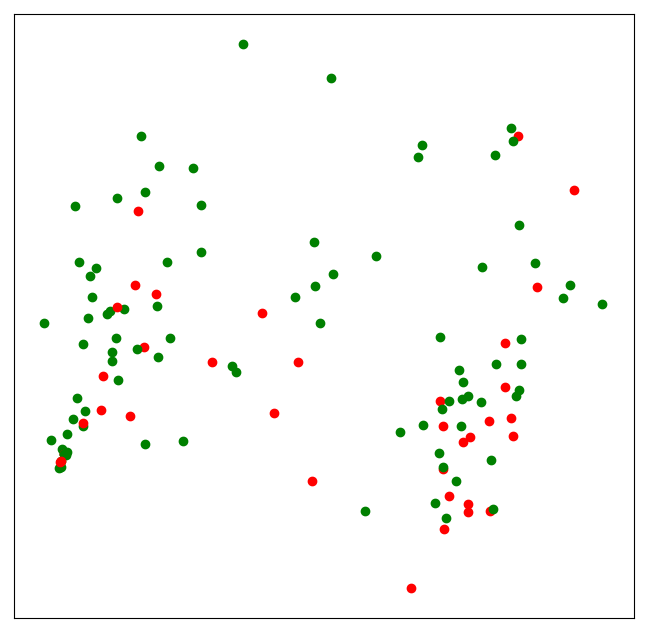

In [71]:
plot_vectors(word_pca, word_grades)

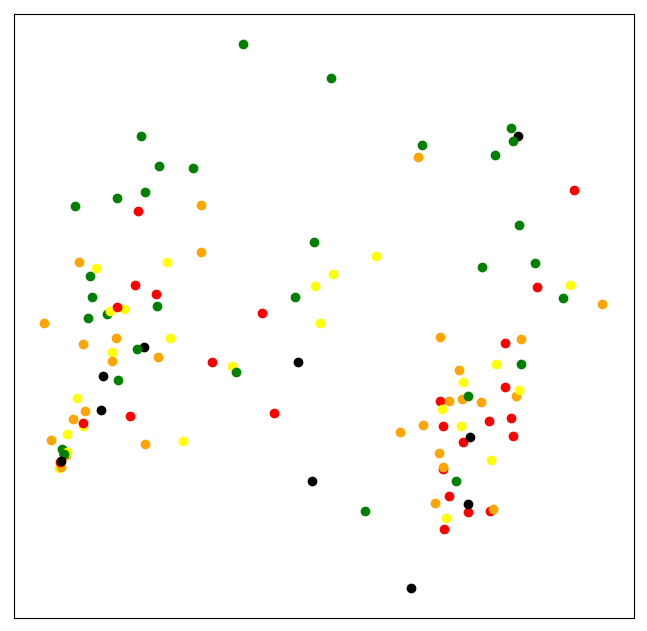

In [75]:
plot_vectors(word_pca, word_grades, c='five')

**Words & Random submission**

In [67]:
word_random_usr_matrix, word_random_avg_grade = get_vectors(word_tokenizer, 
                                                            word_embeddings, 
                                                            programs,
                                                            exercises, 
                                                            grades, 
                                                            students,
                                                            program='random')

In [76]:
word_random_long_vectors, word_random_grades = get_long_vectors(students, word_usr_matrix, word_avg_grade)

In [77]:
word_random_pca = get_pca(word_random_long_vectors)

PCA explained variance ratio: [ 0.08898022  0.03135038] Total: 0.120330595932


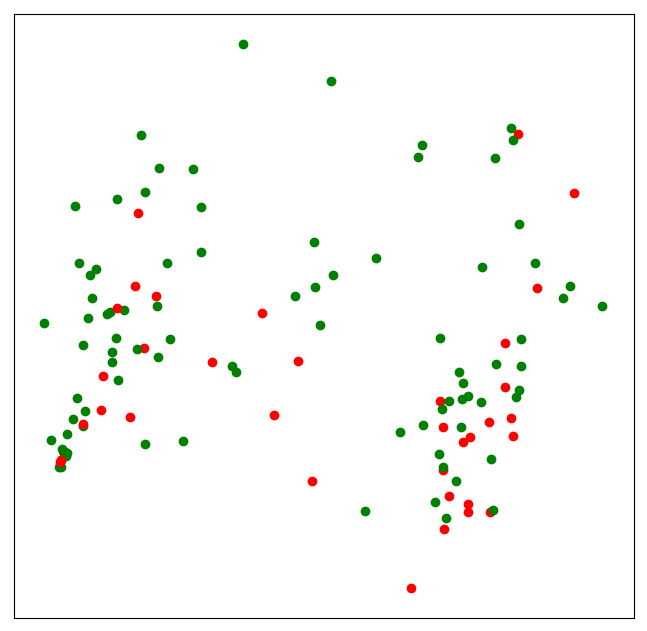

In [78]:
plot_vectors(word_random_pca, word_random_grades)

**Tokens & Latest Submission**

In [80]:
token_usr_matrix, token_avg_grade = get_vectors(token_tokenizer, token_embeddings, programs, exercises, grades, students)

In [81]:
token_long_vectors, token_grades = get_long_vectors(students, token_usr_matrix, token_avg_grade)

In [82]:
token_pca = get_pca(token_long_vectors)

PCA explained variance ratio: [ 0.06041677  0.03690366] Total: 0.0973204294338


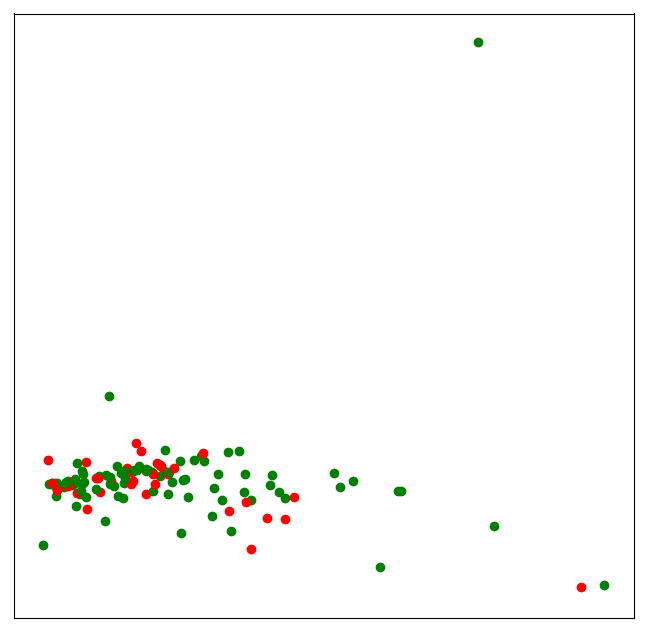

In [83]:
plot_vectors(token_pca, token_grades)

## CA117 on 2016/2017

In [84]:
course = 'ca117'
academic_year = [2016, 2017]

In [85]:
programs, exercises, grades, students = get_data(course, academic_year)

In [86]:
'# Programs: {:,}'.format(len(programs)), '# Exercises', len(exercises), '# Grades: {:,}'.format(len(grades)), '# Students', len(students)

('# Programs: 74,065', '# Exercises', 132, '# Grades: 280', '# Students', 140)

**Words**

In [87]:
word_usr_matrix, word_avg_grade = get_vectors(word_tokenizer, word_embeddings, programs, exercises, grades, students)

In [88]:
word_long_vectors, word_grades = get_long_vectors(students, word_usr_matrix, word_avg_grade)

In [89]:
word_pca = get_pca(word_long_vectors)

PCA explained variance ratio: [ 0.10731454  0.03777042] Total: 0.145084960527


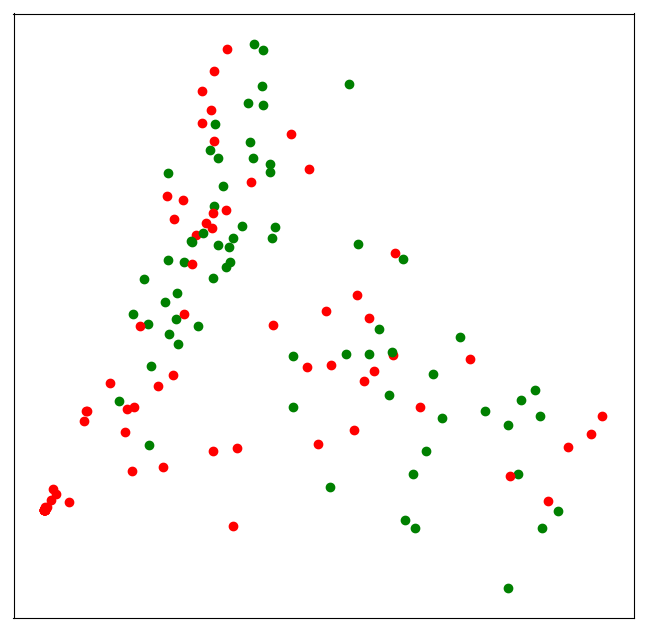

In [90]:
plot_vectors(word_pca, word_grades)

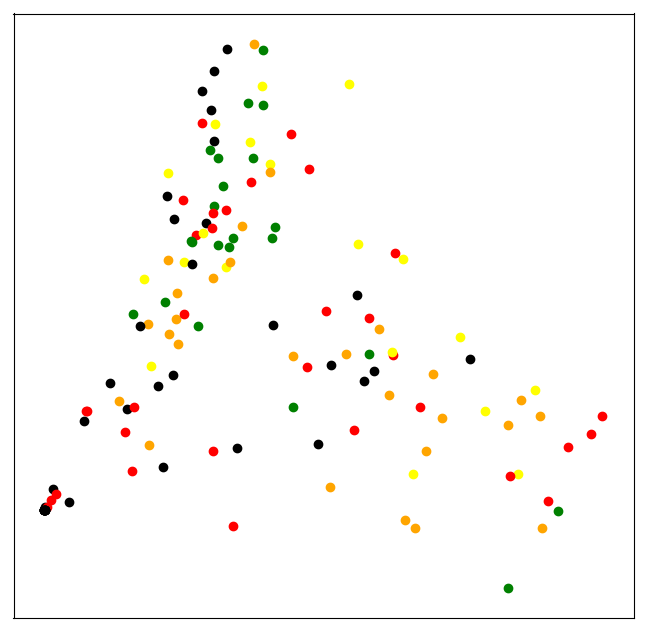

In [95]:
plot_vectors(word_pca, word_grades, c='five')

**Tokens**

In [91]:
token_usr_matrix, token_avg_grade = get_vectors(token_tokenizer, token_embeddings, programs, exercises, grades, students)

In [92]:
token_long_vectors, token_grades = get_long_vectors(students, token_usr_matrix, token_avg_grade)

In [93]:
token_pca = get_pca(token_long_vectors)

PCA explained variance ratio: [ 0.06285195  0.03280914] Total: 0.0956610884975


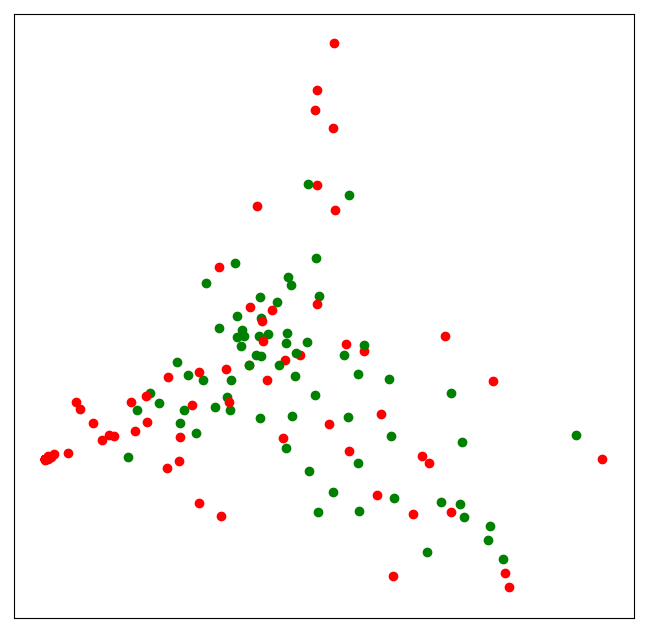

In [94]:
plot_vectors(token_pca, token_grades)

In [ ]:
plot_vectors(token_pca, token_grades, c='five')